# Сборный проект Интернет-магазин «Стримчик»

## Открытие файла и изучение общей информации

In [1]:
from IPython.display import display
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
data = pd.read_csv('/datasets/games.csv')
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Подготовка данных

###  Замена названия столбцов (приведение к нижнему регистру)

Приведем названия столбцов к нижнему регистру:

In [2]:
data.columns = map(str.lower, data.columns)

In [3]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Преобразование данных в нужные типы

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В столбце с рейтингом пользователей обнаружено значение `tbd`, что не позволяет перевести оценки в float или int. На текущем этапе опустим это, но в будущем при работе с оценками исключим данные строки для дальнейшего анализа в целом.

В целом мы видим, что операции со столбцами нужно будет производить только после проведения анализа продаж по регионам, т.к там заполнены все значений. 

### Обработка пропусков

In [5]:
print(data.isnull().sum()) 

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


В данном датафрейме мы видим пропущенные значения в нескольких столбцах. В глаза бросаются столбцы с оценкой и рейтингом, где почти 30% оценок пропущены. Каким либо значением заполнять не имеет смысла, тк будет размытая картинка при дальнейшем анализе. Возможно, эти пропуски связаны с тем, что данные игры не были представлены на условных сайтах типа metacritic, а так же в виду раннего года выхода игры, когда еще не было нынешних рейтинговых подсчетов. Поэтому финальное задание будет выполнено только по тем играм, в которых есть рейтинг. Так же есть пропущенные значений в годе производства игры, но удаление любых строк повлечет за собой влияние на дальнейший анализ по регионам. 
Учитывая вышеизложенное датафрейм не будет изменен по части удаления строк/заполнения значений.

### Суммарные продажи во всех регионах

Создадим столбец `world_sales` для расчета продаж во всех регионах

In [6]:
data['world_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [7]:
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## Исследовательский анализ данных

### Выпуск игр в разные годы

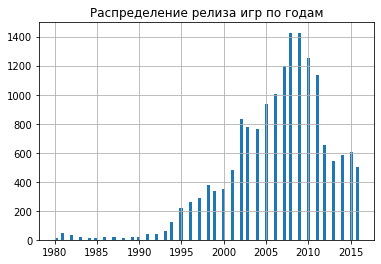

In [8]:
data['year_of_release'].hist(bins=100, range=(1980, 2016))
plt.title('Распределение релиза игр по годам')
plt.show()

По данному графику видно, что пик выпуска игр приходился на 2008-2009 гг., когда выпускалось более 1400 игр в год на все платформы. С 2010 по 2016 годы компания делали упор на опредленные "тайтлы", а не на количество. Данное снижение количества выпущенных игр можно связать с сокращением издержек на производство нерентабельных игр, и в то же время поддержка приносящих прибыль серий как как FIFA, Battlefield и т.д. 

### Продажи по платформам

In [9]:
world_sales_grouped = data.groupby(['platform'])['world_sales'].sum().reset_index().sort_values(by = 'world_sales')

In [10]:
display(world_sales_grouped)

,platform,world_sales
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10
24,TG16,0.16
25,WS,1.42
12,NG,1.44
22,SCD,1.86
3,DC,15.95
8,GEN,30.77
21,SAT,33.59


Для наглядности возьмем 2 самые популярные по проданным копиями приставки (PS2 и Xbox360) и проведем сравнительный анализ с их предыдущими и последующими поколениями(PS1, PS3 и Xbox,XboxONE). К каждой построим по 2 графика (распределение по годам по кол-ву игр и объему выручки)

#### Playstation 1

In [11]:
data_ps = data[(data['platform'] == 'PS')]

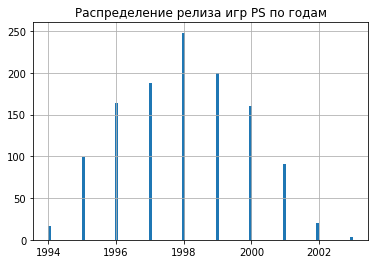

In [12]:
data_ps['year_of_release'].hist(bins=100, range=(1994, 2003))
plt.title('Распределение релиза игр PS по годам')
plt.show()

Text(0.5, 1.0, 'Распределение выручки от выпущенных игр по годам')

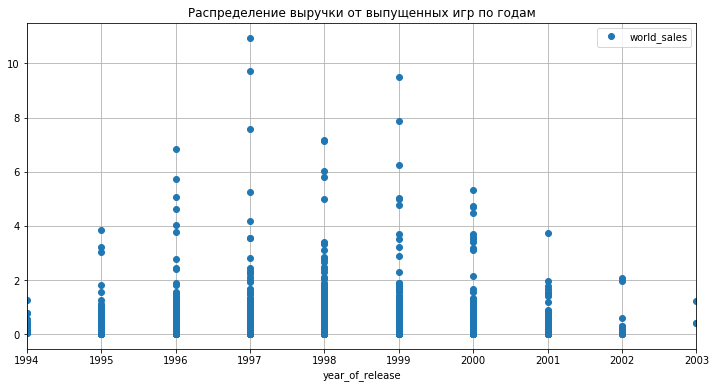

In [13]:
data_ps.plot(x='year_of_release', y='world_sales', style='o', xlim=(1994, 2003), grid=True,
        figsize=(12, 6))
plt.title('Распределение выручки от выпущенных игр по годам')

In [14]:
data_ps_grouped = data_ps.groupby(['year_of_release'])['world_sales'].sum().reset_index().sort_values(by = 'world_sales')

In [15]:
print('Сбор выручки от продаж игр по годам на платформе Playstation 1')
display(data_ps_grouped)

Сбор выручки от продаж игр по годам на платформе Playstation 1


,year_of_release,world_sales
9,2003.0,2.07
0,1994.0,6.03
8,2002.0,6.67
7,2001.0,35.59
1,1995.0,35.96
2,1996.0,94.70
6,2000.0,96.37
3,1997.0,136.17
5,1999.0,144.53
4,1998.0,169.49


Из представленных выше графиков мы видим следующее:
1. Жизненный цикл платформы PS составил 10 лет.
2. Пик релиза игр на PS пришелся на 5-й год жизненного цикла. При этом на втором графике видно что в этом году были выпущены игры с невысоким уровнем продаж. Игр с высоким уровнем продаж выходили на 4 и 6 годы жизни консоли. 
3. За счет бОльшего выпуска количества игр 1998 год оказался самым успешным по уровню продаж и количеству выпущенных игр.

#### Playstation 2

In [16]:
data_ps2 = data[(data['platform'] == 'PS2')]

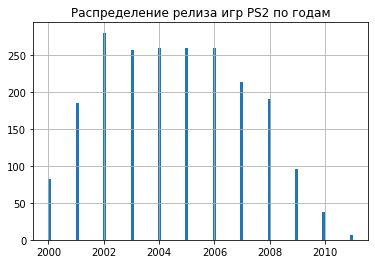

In [17]:
data_ps2['year_of_release'].hist(bins=100, range=(2000, 2011))
plt.title('Распределение релиза игр PS2 по годам')
plt.show()

Text(0.5, 1.0, 'Распределение выручки от выпущенных игр по годам')

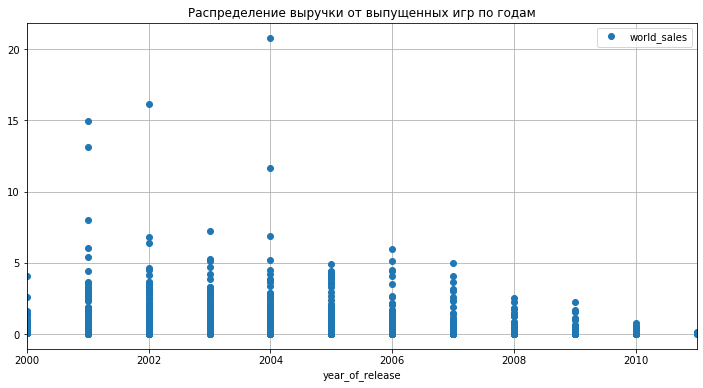

In [18]:
data_ps2.plot(x='year_of_release', y='world_sales', style='o', xlim=(2000, 2011), grid=True,
        figsize=(12, 6))
plt.title('Распределение выручки от выпущенных игр по годам')

In [19]:
data_ps2_grouped = data_ps2.groupby(['year_of_release'])['world_sales'].sum().reset_index().sort_values(by = 'world_sales')

In [20]:
print('Сбор выручки от продаж игр по годам на платформе Playstation 2')
display(data_ps2_grouped)

Сбор выручки от продаж игр по годам на платформе Playstation 2


,year_of_release,world_sales
11,2011.0,0.45
10,2010.0,5.64
9,2009.0,26.40
0,2000.0,39.17
8,2008.0,53.90
7,2007.0,75.99
6,2006.0,103.42
5,2005.0,160.66
1,2001.0,166.43
3,2003.0,184.31


Из представленных выше графиков мы видим следующее:
1. Жизненный цикл платформы PS2 составил 11 лет.
2. Пик релиза игр на PS пришелся на 3-й год жизненного цикла. При этом на втором графике видно что игры с самыми высокими продажами были выпущены на 2-м, 3-м и 5-м годах жизни консоли.  
3. 2004 год(5-й жизни консоли) за счет выпуска 1 игры (GTA SA) с супер продажами стал самым успешным в истории PS2.

#### Playstation 3

In [21]:
data_ps3 = data[(data['platform'] == 'PS3')]

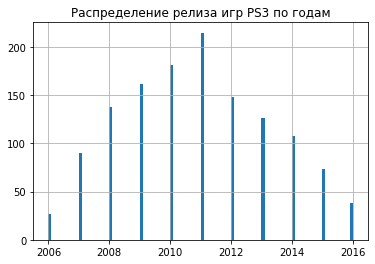

In [22]:
data_ps3['year_of_release'].hist(bins=100, range=(2006, 2016))
plt.title('Распределение релиза игр PS3 по годам')
plt.show()

Text(0.5, 1.0, 'Распределение выручки от выпущенных игр по годам')

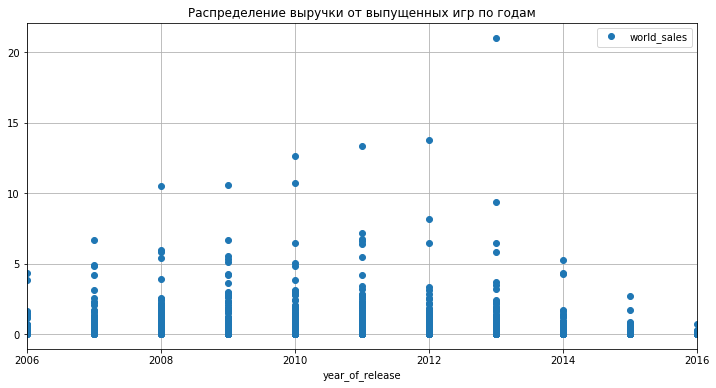

In [23]:
data_ps3.plot(x='year_of_release', y='world_sales', style='o', xlim=(2006, 2016), grid=True,
        figsize=(12, 6))
plt.title('Распределение выручки от выпущенных игр по годам')

In [24]:
data_ps3_grouped = data_ps3.groupby(['year_of_release'])['world_sales'].sum().reset_index().sort_values(by = 'world_sales')

In [25]:
print('Сбор выручки от продаж игр по годам на платформе Playstation 3')
display(data_ps3_grouped)

Сбор выручки от продаж игр по годам на платформе Playstation 3


,year_of_release,world_sales
10,2016.0,3.60
9,2015.0,16.82
0,2006.0,20.96
8,2014.0,47.76
1,2007.0,73.19
6,2012.0,107.36
7,2013.0,113.25
2,2008.0,118.52
3,2009.0,130.93
4,2010.0,142.17


Из представленных выше графиков мы видим следующее:
1. Жизненный цикл платформы PS3 составил 10 лет.
2. Пик релиза игр на PS пришелся на 6-й год жизненного цикла. 
3. 2011 год(6-й жизни консоли) стал самым успешным по части количества проданных копий в истории PS3.

#### Playstation 4

In [26]:
data_PS4 = data[(data['platform'] == 'PS4')]

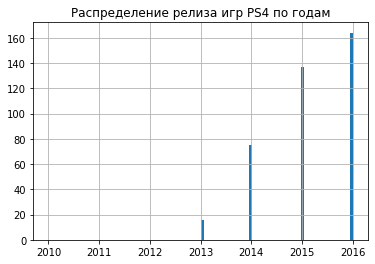

In [27]:
data_PS4['year_of_release'].hist(bins=100, range=(2010, 2016))
plt.title('Распределение релиза игр PS4 по годам')
plt.show()

Text(0.5, 1.0, 'Распределение выручки от выпущенных игр по годам')

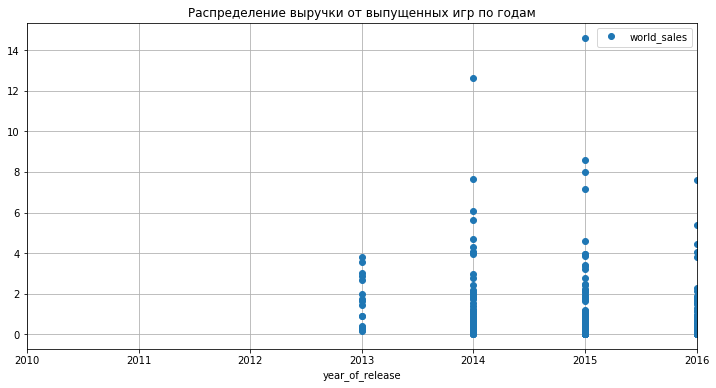

In [28]:
data_PS4.plot(x='year_of_release', y='world_sales', style='o', xlim=(2010, 2016), grid=True,
        figsize=(12, 6))
plt.title('Распределение выручки от выпущенных игр по годам')

In [29]:
data_PS4_grouped = data_PS4.groupby(['year_of_release'])['world_sales'].sum().reset_index().sort_values(by = 'world_sales')

In [30]:
print('Сбор выручки от продаж игр по годам на платформе Playstation 3')
display(data_PS4_grouped)

Сбор выручки от продаж игр по годам на платформе Playstation 3


,year_of_release,world_sales
0,2013.0,25.99
3,2016.0,69.25
1,2014.0,100.00
2,2015.0,118.90


В настоящий момент консоль лишь на 4-м году жизни поколения

#### Xbox

In [31]:
data_XB = data[(data['platform'] == 'XB')]

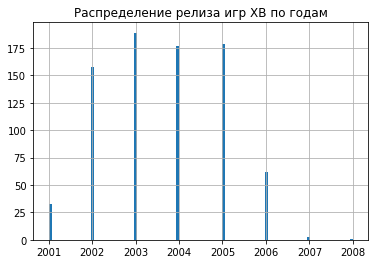

In [32]:
data_XB['year_of_release'].hist(bins=100, range=(2001, 2008))
plt.title('Распределение релиза игр XB по годам')
plt.show()

Text(0.5, 1.0, 'Распределение выручки от выпущенных игр по годам')

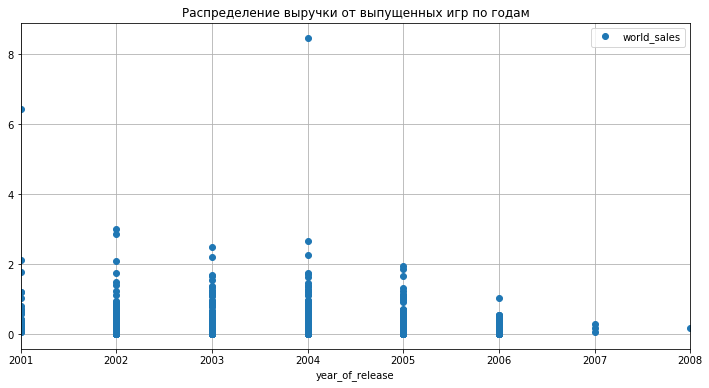

In [33]:
data_XB.plot(x='year_of_release', y='world_sales', style='o', xlim=(2001, 2008), grid=True,
        figsize=(12, 6))
plt.title('Распределение выручки от выпущенных игр по годам')

In [34]:
data_XB_grouped = data_XB.groupby(['year_of_release'])['world_sales'].sum().reset_index().sort_values(by = 'world_sales')

In [35]:
print('Сбор выручки от продаж игр по годам на платформе Xbox')
display(data_XB_grouped)

Сбор выручки от продаж игр по годам на платформе Xbox


,year_of_release,world_sales
8,2008.0,0.18
7,2007.0,0.55
0,2000.0,0.99
6,2006.0,10.04
1,2001.0,22.26
2,2002.0,48.01
5,2005.0,49.08
3,2003.0,55.04
4,2004.0,65.42


Из представленных выше графиков мы видим следующее:
1. Жизненный цикл платформы Xbox составил 9 лет.
2. Пик релиза игр на Xbox пришелся на 3-5 годы жизненного цикла. 
3. 2004 год (5-й жизни консоли) стал самым успешным по части количества проданных копий в истории Xbox.

#### Xbox 360

In [36]:
data_X360 = data[(data['platform'] == 'X360')]

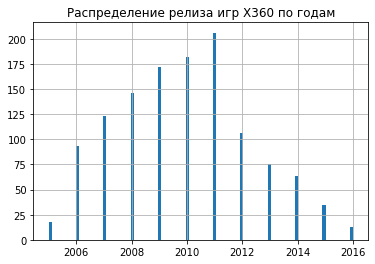

In [37]:
data_X360['year_of_release'].hist(bins=100, range=(2005, 2016))
plt.title('Распределение релиза игр X360 по годам')
plt.show()

Text(0.5, 1.0, 'Распределение выручки от выпущенных игр по годам')

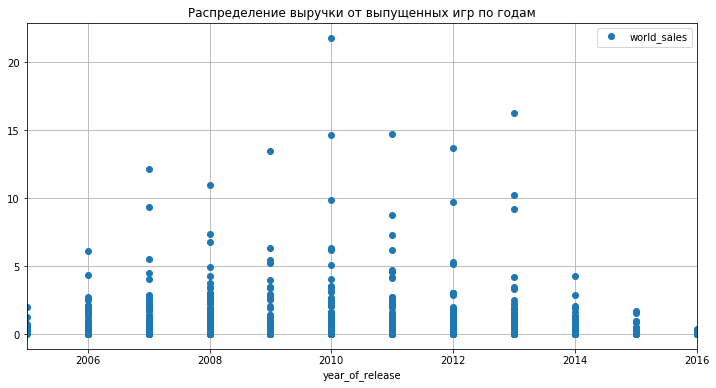

In [38]:
data_X360.plot(x='year_of_release', y='world_sales', style='o', xlim=(2005, 2016), grid=True,
        figsize=(12, 6))
plt.title('Распределение выручки от выпущенных игр по годам')

In [39]:
data_X360_grouped = data_X360.groupby(['year_of_release'])['world_sales'].sum().reset_index().sort_values(by = 'world_sales')

In [40]:
print('Сбор выручки от продаж игр по годам на платформе X360')
display(data_X360_grouped)

Сбор выручки от продаж игр по годам на платформе X360


,year_of_release,world_sales
11,2016.0,1.52
0,2005.0,8.25
10,2015.0,11.96
9,2014.0,34.74
1,2006.0,51.62
8,2013.0,88.58
2,2007.0,95.41
7,2012.0,99.74
4,2009.0,120.29
3,2008.0,135.26


Из представленных выше графиков мы видим следующее:
1. Жизненный цикл платформы Xbox составил 12 лет.
2. Пик релиза игр на Xbox пришелся на 7-й год жизненного цикла. 
3. 2010 год (6-й жизни консоли) стал самым успешным по части количества проданных копий в истории Xbox.

#### Xbox One

In [41]:
data_XOne = data[(data['platform'] == 'XOne')]

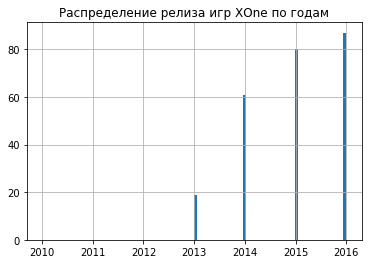

In [42]:
data_XOne['year_of_release'].hist(bins=100, range=(2010, 2016))
plt.title('Распределение релиза игр XOne по годам')
plt.show()

Text(0.5, 1.0, 'Распределение выручки от выпущенных игр по годам')

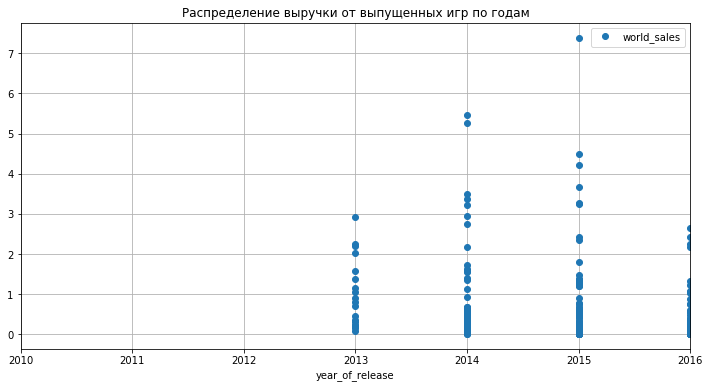

In [43]:
data_XOne.plot(x='year_of_release', y='world_sales', style='o', xlim=(2010, 2016), grid=True,
        figsize=(12, 6))
plt.title('Распределение выручки от выпущенных игр по годам')

In [44]:
data_XOne_grouped = data_XOne.groupby(['year_of_release'])['world_sales'].sum().reset_index().sort_values(by = 'world_sales')

In [45]:
print('Сбор выручки от продаж игр по годам на платформе XOne')
display(data_XOne_grouped)

Сбор выручки от продаж игр по годам на платформе XOne


,year_of_release,world_sales
0,2013.0,18.96
3,2016.0,26.15
1,2014.0,54.07
2,2015.0,60.14


В настоящий момент консоль лишь на 4-м году жизни поколения

Общий вывод по разделу анализа выпуска игр по самым популярным консолям.
Были рассмотрены 2 самых крупных компании Sony и Microsoft в лице консолей Playstation трёх поколений и Xbox стольки же поколений.
Выводы:
1. Жизненный цикл консолей составляет в среднем около 10 лет с момента выпуска первой игры до выпуска последней.
2. Пик продаж игр приходится на 5-6 годы жизни поколения консоли. 
3. Новые консоли выпускаются в среднем на 7-9 год жизни предыдущего поколения

### Анализ данных за соответствующий актуальный период

По итогам предыдущего анализа был найден средний период жизни консоли - 10 лет. Уберем из датафрейма данные старше этого периода, то есть возьмем датафрейм за период 2007-2016

Для начала удалим строки с пустыми значениями в столбце "год" и переведем столбик в тип int

In [46]:
data_dropped = data.dropna(subset = ['year_of_release']).reset_index(drop
= True)

In [47]:
data_dropped['year_of_release'] = data_dropped['year_of_release'].apply(np.ceil).astype('int')

In [48]:
data_new = data_dropped[(data_dropped['year_of_release'] >= 2010)].reset_index(drop
= True)

In [49]:
display(data_new)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
5272,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
5273,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
5274,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
5275,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [50]:
data_new_graphic = data_new.groupby(['platform', 'year_of_release'])['world_sales'].sum().reset_index()

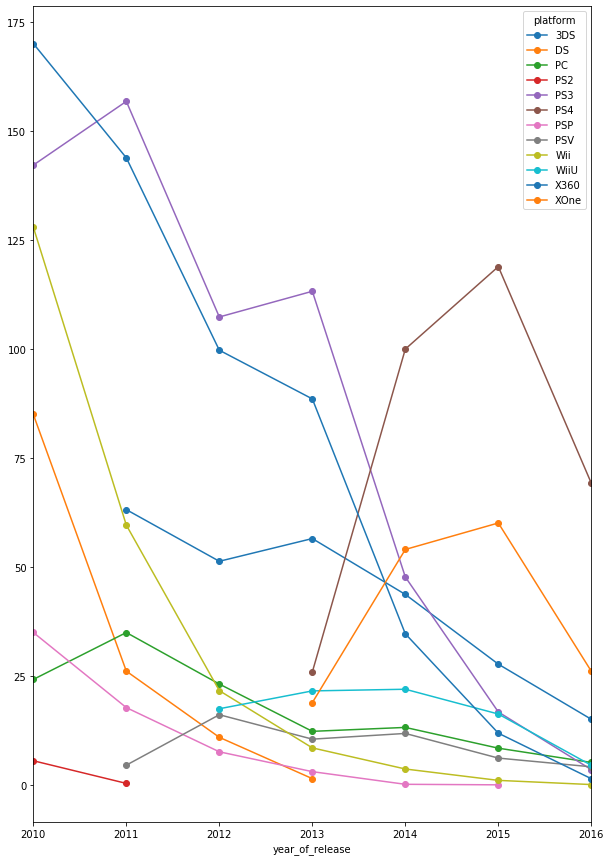

In [51]:
data_new_graphic.pivot_table('world_sales', 'year_of_release', 'platform', aggfunc='mean').plot(figsize=(10,15),
          kind='line', marker='o', xticks=data_new_graphic.year_of_release.unique())

По данному графику видно, что рост выручки уверенно идет у двух консолей = PS4 и XboxOne

(0, 20)

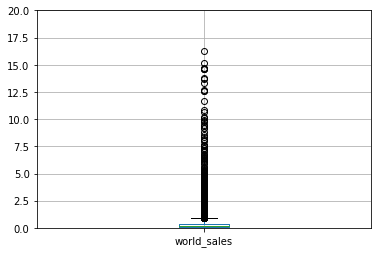

In [52]:
data_new.boxplot(column='world_sales')
plt.ylim(0, 20)

Медианное значение продаж игр в период с 2010 по 2016 годы находится на уровне 0.13 млн копий, при это отчетливо видны сколько "выбросов" присутствует на графике. Иными словами можно сделать вывод, что игры в большинстве своем продаются очень небольшми тиражами, однако имеются такие игры, которые выстреливают сразу на условне 15 миллионов копий и приносят компании основной доход. 

Учитывая ранее проведенный анализ можно совершенно точно сделать вывод, что PS4 и XboxONE являются наиболее перпективными консолями в 2017 году. В эту пользу указывает и тренд на рост по части производства игр, продаж и цикл жизни консоли, который начался в 2013 году. 

### Диаграмма рассеяния и корреляция между отзывами и продажами. 

На данном этапе исследования за основу возьмем самую перспективную консоль на 2016 год - PS4 и ее главного соперника - XboxOne. Насколько мы помним, в начале исследования мы не проводили операции с первоначальным датафреймом. Возьмем его за основу и удалим пропущенные значения, после чего рассмотрим по отдельности период с 2013 года по PS4 и по XboxOne

In [53]:
data_new_rating = data_dropped[(data_dropped['year_of_release'] >= 2013)].reset_index(drop
= True)

In [54]:
print(data_new_rating.isnull().sum()) 

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1242
user_score          933
rating              977
world_sales           0
dtype: int64


In [55]:
pd.to_numeric(data_new_rating['critic_score'], errors='coerce')


0       97.0
1       97.0
2        NaN
3        NaN
4       97.0
        ... 
2228     NaN
2229     NaN
2230     NaN
2231     NaN
2232     NaN
Name: critic_score, Length: 2233, dtype: float64

In [56]:
pd.to_numeric(data_new_rating['user_score'], errors='coerce')

0       8.2
1       8.1
2       NaN
3       NaN
4       8.3
       ... 
2228    NaN
2229    NaN
2230    NaN
2231    NaN
2232    NaN
Name: user_score, Length: 2233, dtype: float64

In [57]:
data_new_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 12 columns):
name               2233 non-null object
platform           2233 non-null object
year_of_release    2233 non-null int64
genre              2233 non-null object
na_sales           2233 non-null float64
eu_sales           2233 non-null float64
jp_sales           2233 non-null float64
other_sales        2233 non-null float64
critic_score       991 non-null float64
user_score         1300 non-null object
rating             1256 non-null object
world_sales        2233 non-null float64
dtypes: float64(6), int64(1), object(5)
memory usage: 209.5+ KB


In [58]:
data_new_rating_notbd = data_new_rating[(data_new_rating['user_score'] != 'tbd')].reset_index(drop
= True)

In [59]:
data_new_rating_notbd['user_score'] = data_new_rating_notbd['user_score'].astype('float')

In [60]:
data_new_rating_notbd.dropna(subset = ['user_score'],
inplace = True)

In [61]:
data_new_rating_notbd.dropna(subset = ['critic_score'],
inplace = True)

In [62]:
display(data_new_rating_notbd)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
6,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
7,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
...,...,...,...,...,...,...,...,...,...,...,...,...
2089,Saints Row: Gat out of Hell,XOne,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
2098,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
2105,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
2108,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01


In [63]:
data_new_rating_drop_corr = data_new_rating_notbd[['platform']]
data_new_rating_drop_corr['world_sales'] = data_new_rating_notbd[['world_sales']]
data_new_rating_drop_corr['user_score'] = data_new_rating_notbd[['user_score']]
data_new_rating_drop_corr['critic_score'] = data_new_rating_notbd[['critic_score']]
data_new_rating_drop_corr['genre'] = data_new_rating_notbd[['genre']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [64]:
display(data_new_rating_drop_corr)

,platform,world_sales,user_score,critic_score,genre
0,PS3,21.05,8.2,97.0,Action
1,X360,16.27,8.1,97.0,Action
4,PS4,12.62,8.3,97.0,Action
6,X360,10.24,2.6,73.0,Shooter
7,PS3,9.36,2.6,71.0,Shooter
...,...,...,...,...,...
2089,XOne,0.01,6.0,65.0,Action
2098,XOne,0.01,8.2,63.0,Racing
2105,WiiU,0.01,8.5,81.0,Action
2108,XOne,0.01,6.7,74.0,Action


#### Playstation 4

In [65]:
data_new_rating_drop_PS4 = data_new_rating_drop_corr[(data_new_rating_drop_corr['platform'] == 'PS4')].reset_index(drop
= True)

In [66]:
display(data_new_rating_drop_PS4)

,platform,world_sales,user_score,critic_score,genre
0,PS4,12.62,8.3,97.0,Action
1,PS4,8.58,4.3,82.0,Sports
2,PS4,7.66,5.7,83.0,Shooter
3,PS4,7.60,5.0,85.0,Sports
4,PS4,7.17,6.5,87.0,Role-Playing
...,...,...,...,...,...
244,PS4,0.01,2.3,42.0,Action
245,PS4,0.01,6.8,70.0,Adventure
246,PS4,0.01,7.5,69.0,Adventure
247,PS4,0.01,7.9,61.0,Role-Playing


In [67]:
data_new_rating_drop_PS4.corr()

,world_sales,user_score,critic_score
world_sales,1.000000,-0.033625,0.405895
user_score,-0.033625,1.000000,0.557654
critic_score,0.405895,0.557654,1.000000


По данным в указанной выше таблице можно сделать вывод, что рейтинг пользователей никак не влияет на мировые продажи, тогда как оценки критиков оказывают значимое влияние на продажи игр платформы PS4. Кроме того, видна связь между оценками пользователей и критиков. 

#### Xbox One

In [68]:
data_new_rating_drop_xone = data_new_rating_drop_corr[(data_new_rating_drop_corr['platform'] == 'XOne')].reset_index(drop
= True)

In [69]:
display(data_new_rating_drop_xone)

,platform,world_sales,user_score,critic_score,genre
0,XOne,5.47,7.9,97.0,Action
1,XOne,5.26,5.4,81.0,Shooter
2,XOne,4.49,6.4,84.0,Shooter
3,XOne,4.22,6.2,88.0,Role-Playing
4,XOne,3.50,4.1,72.0,Action
...,...,...,...,...,...
160,XOne,0.01,7.5,66.0,Adventure
161,XOne,0.01,6.3,53.0,Simulation
162,XOne,0.01,6.0,65.0,Action
163,XOne,0.01,8.2,63.0,Racing


In [70]:
data_new_rating_drop_xone.corr()

,world_sales,user_score,critic_score
world_sales,1.000000,-0.094003,0.410422
user_score,-0.094003,1.000000,0.472462
critic_score,0.410422,0.472462,1.000000


На платформе Xbox One те же самые связи между оценками и продажами, а так корреляцией между оценками. 

По итогам указанного выше анализа можно сделать вывод, что оценки критиков оказывают гораздо более существенное влияние на продажи, чем оценки пользователей. 

### Распределение игр по жанрам

In [71]:
genre_sales_grouped = data.groupby(['genre'])['world_sales'].sum().reset_index().sort_values(by = 'world_sales')

In [72]:
display(genre_sales_grouped)

,genre,world_sales
11,Strategy,174.23
1,Adventure,237.59
5,Puzzle,242.57
9,Simulation,389.97
2,Fighting,447.53
6,Racing,728.67
3,Misc,802.51
4,Platform,827.77
7,Role-Playing,934.56
8,Shooter,1052.45


In [73]:
genre_sales_grouped_count = data.groupby(['genre'])['world_sales'].count().reset_index().sort_values(by = 'world_sales')

In [74]:
display(genre_sales_grouped_count)

,genre,world_sales
5,Puzzle,580
11,Strategy,683
2,Fighting,849
9,Simulation,873
4,Platform,888
6,Racing,1249
1,Adventure,1303
8,Shooter,1323
7,Role-Playing,1498
3,Misc,1750


По данным таблицам видно, что самым популярным в истории жарном является экшены. Спортивные игры и шутеры на находятся на 2-3 местах. Самыми непопулярными жанрами являюся стратегии, приключения и пазлы. По количеству продаж также лидером является жанр экшн. 

## Портрет пользователя каждого региона

### Cамые популярные платформы (топ-5)

In [75]:
data_na = data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by = 'na_sales', ascending = False)
data_eu = data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by = 'eu_sales', ascending = False)
data_jp = data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', ascending = False)

In [76]:
print('Топ-5 платформ по продажам игр в Северной Америке')
data_na.head(5)



Топ-5 платформ по продажам игр в Северной Америке


,platform,na_sales
28,X360,602.47
16,PS2,583.84
26,Wii,496.90
17,PS3,393.49
4,DS,382.40


In [77]:
print('Топ-5 платформ по продажам игр в Европе')
data_eu.head(5)

Топ-5 платформ по продажам игр в Европе


,platform,eu_sales
16,PS2,339.29
17,PS3,330.29
28,X360,270.76
26,Wii,262.21
15,PS,213.61


In [78]:
print('Топ-5 платформ по продажам игр в Японии')
data_jp.head(5)

Топ-5 платформ по продажам игр в Японии


,platform,jp_sales
4,DS,175.57
15,PS,139.82
16,PS2,139.20
23,SNES,116.55
2,3DS,100.67


Выше представлены топ-5 приставок по продажам в регионах. Самой популярной приставкой в Северной Америке является Xbox360, в Европе это Playstation 2, а в Японии Nintendo DS.
Примечательно, что объем продаж PS2 в Америке почти на одном уровне с хбокс360 и в 2 раза выше чем в Европе. То же самое с Nintendo DS. Из чего можно сделать вывод, что Североамериканский рынок - основной для всех производителей приставок. 

### Самые популярные жанры (топ-5)

In [79]:
genre_na = data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by = 'na_sales', ascending = False)
genre_eu = data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by = 'eu_sales', ascending = False)
genre_jp = data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', ascending = False)

In [80]:
print('Топ-5 жанров по продажам игр в Северной Америке')
genre_na.head(5)

Топ-5 жанров по продажам игр в Северной Америке


,genre,na_sales
0,Action,879.01
10,Sports,684.43
8,Shooter,592.24
4,Platform,445.50
3,Misc,407.27


In [81]:
print('Топ-5 жанров по продажам игр в Европе')
genre_eu.head(5)

Топ-5 жанров по продажам игр в Европе


,genre,eu_sales
0,Action,519.13
10,Sports,376.79
8,Shooter,317.34
6,Racing,236.51
3,Misc,212.74


In [82]:
print('Топ-5 жанров по продажам игр в Японии')
genre_jp.head(5)

Топ-5 жанров по продажам игр в Японии


,genre,jp_sales
7,Role-Playing,355.41
0,Action,161.43
10,Sports,135.54
4,Platform,130.83
3,Misc,108.11


Из представленной информации мы видим идентичность в игровых предпочтениях в Европе и Америке. В Японии же с большим отрывов популярен жанр РПГ, которого на других рынка нету в топ-5. 

### Влияние рейтинга игры на продажи

In [83]:
rating_na = data.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by = 'na_sales', ascending = False)
rating_eu = data.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by = 'eu_sales', ascending = False)
rating_jp = data.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by = 'jp_sales', ascending = False)

In [84]:
print('Распределение продаж игр по рейтингу в Северной Америке')
display(rating_na)

Распределение продаж игр по рейтингу в Северной Америке


,rating,na_sales
1,E,1292.99
7,T,759.75
5,M,748.48
2,E10+,353.32
4,K-A,2.56
3,EC,1.53
0,AO,1.26
6,RP,0.00


In [85]:
print('Распределение продаж игр по рейтингу в Европе')
display(rating_eu)

Распределение продаж игр по рейтингу в Европе


,rating,eu_sales
1,E,710.25
5,M,483.97
7,T,427.03
2,E10+,188.52
0,AO,0.61
4,K-A,0.27
3,EC,0.11
6,RP,0.08


In [86]:
print('Распределение продаж игр по рейтингу в Японии')
display(rating_jp)

Распределение продаж игр по рейтингу в Японии


,rating,jp_sales
1,E,198.11
7,T,151.40
5,M,64.24
2,E10+,40.20
4,K-A,1.46
0,AO,0.00
3,EC,0.00
6,RP,0.00


Самыми популрными играми во всех регионах являются игры "для всех"

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [87]:
data_new_rating_drop_PC = data_new_rating_drop_corr[(data_new_rating_drop_corr['platform'] == 'PC')].reset_index(drop
= True)

In [88]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(data_new_rating_drop_PC['user_score'], data_new_rating_drop_xone['user_score'], equal_var = False)
print('p-значение:', results.pvalue) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.17882648263401307
Не получилось отвергнуть нулевую гипотезу


Таким образом, пользовательские рейтинги в среднем одинаковы на приставках Xbox One и PC/ 

### Средние пользовательские рейтинги жанров Action и Sports разные

In [89]:
data_new_rating_drop_action = data_new_rating_drop_corr[(data_new_rating_drop_corr['genre'] == 'Action')].reset_index(drop
= True)

In [90]:
data_new_rating_drop_sports = data_new_rating_drop_corr[(data_new_rating_drop_corr['genre'] == 'Sports')].reset_index(drop
= True)

In [91]:
alpha = 0.05
results = st.ttest_ind(data_new_rating_drop_action['user_score'], data_new_rating_drop_sports['user_score'], equal_var = False)
print('p-значение:', results.pvalue) 

if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0496920005008588e-13
Отвергаем нулевую гипотезу


Подтвердилать гипотеза, что пользовательские рейтинги жанров Action и Sports разные. 

## Общий вывод

По итогам проведенного исследования можно сделать следующие выводы:
1. Жизненный цикл консоли в среднем составляет около 10 лет;
2. Пик продаж и производства игр приходится на 4-7 года поколения;
3. После выпуска нового поколения консоли предыдущее живет около 3 лет;
4. Североамериканский рынок самый крупный из представленных;
5. По состоянию на 2016 год самыми перспективными консолями являются Playstation 4 и Xbox One;
6. Существенное влияние на продажи оказывают оценки критиков, тогда как оценки пользователей не влияют никак;
7. Японский рынок имеет свою специфику и свои предпочтения, тогда как Североамериканский и Европейски почти одинаковые, за исключением размера. 